In [3]:
import numpy as np
import pandas as pd

In [4]:
df_data = pd.read_csv('kidney_disease.csv')


In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df_data.shape


(400, 26)

In [7]:
df_data.drop('id',axis=1, inplace=True)

In [8]:
df_data.head(3)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.01,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd


In [9]:
df_data.columns = ['age', 'blood_pressure', 'specific_gravity','albumin','sugar','red_blood_cells','pus_cells',
                   'pus_cells_clumps','bacteria','blood_glucose_random','blood_urea','serum_creatinine','sodium',
                   'potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count',
                   'hypertension','diabetes_mellitus','coronary_artery_disease','appetite','peda_edama','anemia','class']

In [10]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cells_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edama,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [11]:
text_columns = ['packed_cell_volume','white_blood_cell_count','red_blood_cell_count']

In [12]:
def object_to_numeric(df,column):
    df[column] = pd.to_numeric(df[column],errors = 'coerce')
    print(f"{column} : dataType: {df[column].dtype}")

In [13]:
for column in text_columns:
    object_to_numeric(df_data, column)

packed_cell_volume : dataType: float64
white_blood_cell_count : dataType: float64
red_blood_cell_count : dataType: float64


In [14]:
missing= df_data.isnull().sum()

In [15]:
missing[missing>0].sort_values(ascending=False).head(20)

red_blood_cells           152
red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
pus_cells                  65
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
blood_pressure             12
age                         9
bacteria                    4
pus_cells_clumps            4
hypertension                2
diabetes_mellitus           2
dtype: int64

In [16]:
def mean_value_imputation(df, col):
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

In [17]:
def mode_value_imputation(df,col):
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [18]:
num_columns = [col for col in df_data.columns if df_data[col].dtype != 'object']

In [19]:
cat_columns = [col for col in df_data.columns if df_data[col].dtype == 'object']

In [20]:
for col in num_columns:
    mean_value_imputation(df_data, col)

In [21]:
for col in cat_columns:
    mode_value_imputation(df_data, col)

In [22]:
missing= df_data.isnull().sum()

In [23]:
missing[missing>0].sort_values(ascending=False).head(20)

Series([], dtype: int64)

In [24]:
# Getting the unique for the categorical columns
print(f"diabetes_mellitus: {df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease: {df_data['coronary_artery_disease'].unique()}")
print(f"class: {df_data['class'].unique()}")

diabetes_mellitus: ['yes' 'no' ' yes' '\tno' '\tyes']
coronary_artery_disease: ['no' 'yes' '\tno']
class: ['ckd' 'ckd\t' 'notckd']


In [25]:
#replacing with the correct categorical values
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].replace(to_replace= {' yes':'yes','\tno':'no','\tyes':'yes'})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].replace(to_replace= {'\tno':'no'})
df_data['class'] = df_data['class'].replace(to_replace = {'ckd\t':'ckd', 'notckd':'not ckd'})


In [26]:
#verifying that the values for the columns are mapped correctly
print(f"diabetes_mellitus: {df_data['diabetes_mellitus'].unique()}")
print(f"coronary_artery_disease: {df_data['coronary_artery_disease'].unique()}")
print(f"class: {df_data['class'].unique()}")

diabetes_mellitus: ['yes' 'no']
coronary_artery_disease: ['no' 'yes']
class: ['ckd' 'not ckd']


In [27]:
print(f"diabetes_mellitus: {df_data['hypertension'].unique()}")

diabetes_mellitus: ['yes' 'no']


In [28]:
#feature encoding
df_data['class'] = df_data['class'].map({'ckd':1, 'not ckd':0})
df_data['red_blood_cells'] = df_data['red_blood_cells'].map({'normal':1, 'abnormal':0})
df_data['pus_cells'] = df_data['pus_cells'].map({'normal':1, 'abnormal':0})
df_data['pus_cells_clumps'] = df_data['pus_cells_clumps'].map({'present':1, 'notpresent':0})
df_data['bacteria'] = df_data['bacteria'].map({'present':1, 'notpresent':0})
df_data['hypertension'] = df_data['hypertension'].map({'yes':1, 'no':0})
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].map({'yes':1, 'no':0})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].map({'yes':1, 'no':0})
df_data['appetite'] = df_data['appetite'].map({'good':1, 'poor':0})
df_data['peda_edama'] = df_data['peda_edama'].map({'yes':1, 'no':0})
df_data['anemia'] = df_data['anemia'].map({'yes':1, 'no':0})


In [29]:
df_data.head(3)

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cells_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edama,anemia,class
0,48.0,80.0,1.02,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.02,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.01,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1


In [30]:
df_data.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cells,pus_cells_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edama,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


In [31]:
#importing the seaborn and matplotlib libraries
import matplotlib.pyplot as plt
import seaborn as sns

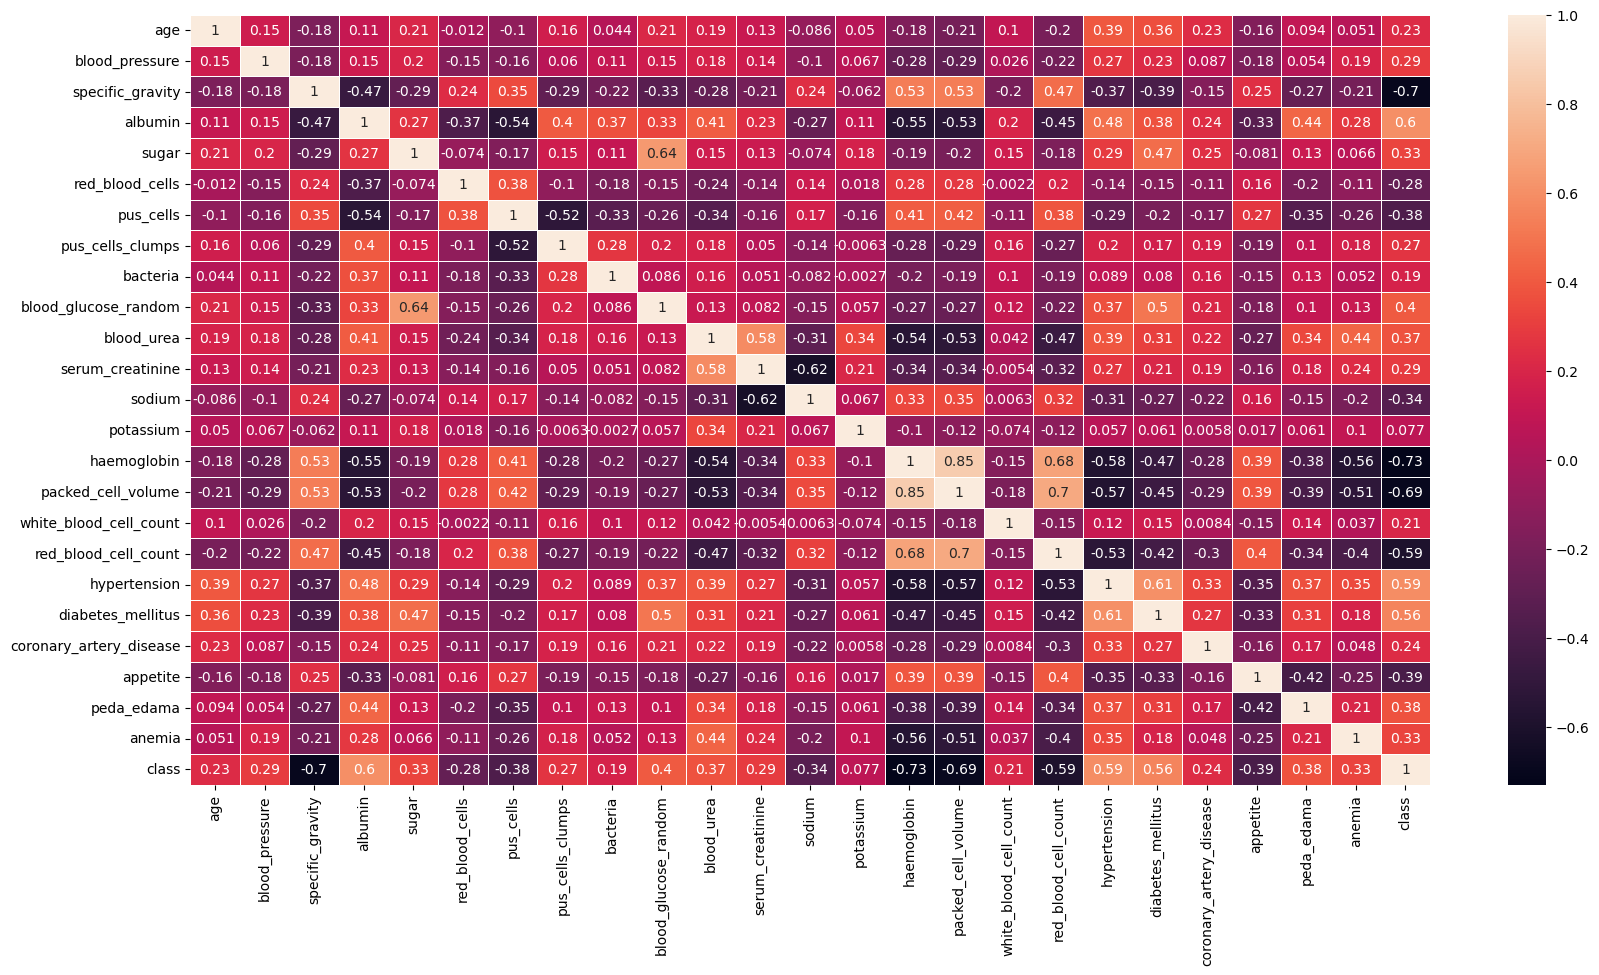

In [32]:
#displaying the correlation
plt.figure(figsize=(20,10))
sns.heatmap(df_data.corr(),annot=True, linewidth=0.5)
plt.show()

In [33]:
target_corr = df_data.corr()['class'].abs().sort_values(ascending=False)[1:]

In [34]:
target_corr

haemoglobin                0.729628
specific_gravity           0.698957
packed_cell_volume         0.690060
albumin                    0.599238
red_blood_cell_count       0.590913
hypertension               0.590438
diabetes_mellitus          0.559060
blood_glucose_random       0.401374
appetite                   0.393341
pus_cells                  0.375154
peda_edama                 0.375154
blood_urea                 0.372033
sodium                     0.342288
sugar                      0.327812
anemia                     0.325396
serum_creatinine           0.294079
blood_pressure             0.290600
red_blood_cells            0.282642
pus_cells_clumps           0.265313
coronary_artery_disease    0.236088
age                        0.225405
white_blood_cell_count     0.205274
bacteria                   0.186871
potassium                  0.076921
Name: class, dtype: float64

In [35]:
#Getting the no of rows in class column
df_data['class'].value_counts()

class
1    250
0    150
Name: count, dtype: int64

In [71]:
#importing the train_test_split module
from sklearn.model_selection import train_test_split

In [73]:
#Divinding the dataset into x and y 
x = df_data.drop('class',axis=1)
y = df_data['class']

In [75]:
#Dividing into train and test set
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=25)

In [77]:
#Getting the shape of test and train set
print(f"x train shape {x_train.shape}")
print(f"x test shape {x_test.shape}")

x train shape (300, 24)
x test shape (100, 24)


In [93]:
#importing all algorithms and assiging in an array
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier(n_neighbors=8)))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('SVM',SVC(kernel='linear')))

In [95]:
#import the metrics to measure model accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,confusion_matrix

In [101]:
#finding the matrix for the models
for name,model in models:
    print(name,model)
    print()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test,y_pred))
    print('\n')
    print("accuracy: ", accuracy_score(y_test,y_pred))
    print('\n')
    print("precision: ", precision_score(y_test,y_pred))
    print('\n')
    print("recall: ", recall_score(y_test,y_pred))
    print('\n')
    print("f1 score: ", f1_score(y_test,y_pred))
    print('\n')

Naive Bayes GaussianNB()

[[37  0]
 [ 5 58]]


accuracy:  0.95


precision:  1.0


recall:  0.9206349206349206


f1 score:  0.9586776859504132


KNN KNeighborsClassifier(n_neighbors=8)

[[31  6]
 [18 45]]


accuracy:  0.76


precision:  0.8823529411764706


recall:  0.7142857142857143


f1 score:  0.7894736842105263


RandomForestClassifier RandomForestClassifier()

[[35  2]
 [ 1 62]]


accuracy:  0.97


precision:  0.96875


recall:  0.9841269841269841


f1 score:  0.9763779527559056


DecisionTreeClassifier DecisionTreeClassifier()

[[35  2]
 [ 1 62]]


accuracy:  0.97


precision:  0.96875


recall:  0.9841269841269841


f1 score:  0.9763779527559056


SVM SVC(kernel='linear')

[[34  3]
 [ 2 61]]


accuracy:  0.95


precision:  0.953125


recall:  0.9682539682539683


f1 score:  0.9606299212598425


